<a href="https://colab.research.google.com/github/irmakkn/calorie_estimation/blob/main/calori_hesab%C4%B1_tahmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import randint, loguniform

In [215]:
train_df= pd.read_csv('train.csv')

In [216]:
test_df= pd.read_csv('test.csv')

In [217]:
test_df.head(10)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5
5,750005,female,43,169.0,65.0,6.0,81.0,39.4
6,750006,male,74,189.0,97.0,9.0,86.0,40.0
7,750007,male,60,186.0,90.0,2.0,79.0,38.1
8,750008,male,21,196.0,91.0,4.0,84.0,38.7
9,750009,male,32,189.0,89.0,29.0,111.0,40.8


In [218]:
train_df.head(10)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0
5,5,female,26,156.0,56.0,19.0,100.0,40.5,103.0
6,6,female,21,172.0,73.0,3.0,81.0,38.3,9.0
7,7,male,46,188.0,94.0,23.0,100.0,40.8,145.0
8,8,female,33,166.0,63.0,25.0,107.0,40.5,161.0
9,9,male,65,185.0,88.0,23.0,104.0,41.0,185.0


In [237]:
train_df.isnull().sum()

,0
id,0
Sex,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0
Weight_log,0


In [219]:
test_df.isnull().sum()

,0
id,0
Sex,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0


In [220]:
test_df['Sex'] = test_df['Sex'].map({'male':0, 'female':1})

In [221]:
train_df['Sex'] = train_df['Sex'].map({'male':0, 'female':1})

In [222]:
train_df.describe()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,0.500961,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,0.499999,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,1.000000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,1.000000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [223]:
test_df.describe()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,874999.500000,0.501124,41.452464,174.725624,75.147712,15.415428,95.479084,40.036093
std,72168.927986,0.500000,15.177769,12.822039,13.979513,8.349133,9.450161,0.778448
min,750000.000000,0.000000,20.000000,127.000000,39.000000,1.000000,67.000000,37.100000
25%,812499.750000,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,874999.500000,1.000000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000
75%,937499.250000,1.000000,52.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,999999.000000,1.000000,79.000000,219.000000,126.000000,30.000000,128.000000,41.500000


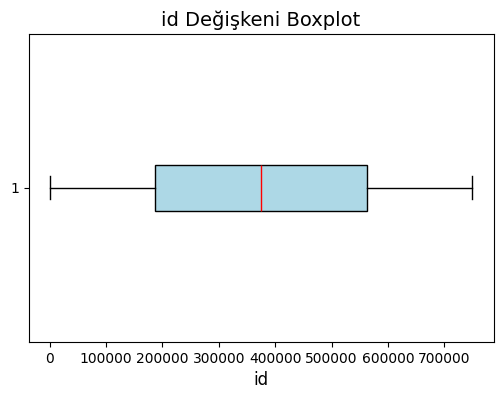

id - Aykırı değer sayısı: 0
----------------------------------------


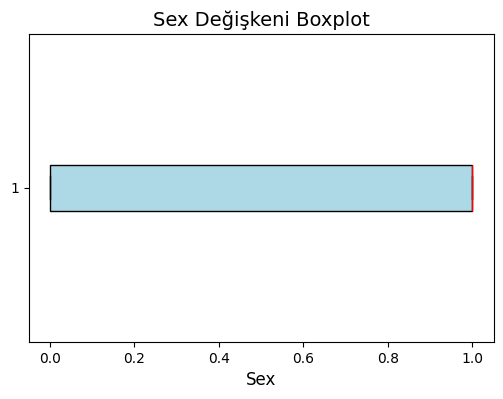

Sex - Aykırı değer sayısı: 0
----------------------------------------


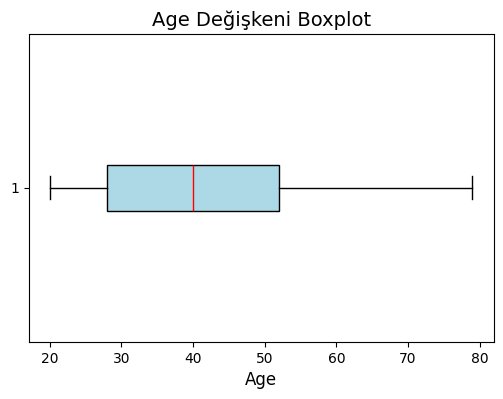

Age - Aykırı değer sayısı: 0
----------------------------------------


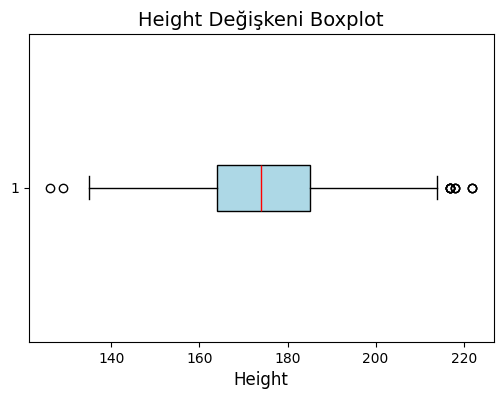

Height - Aykırı değer sayısı: 14
Aykırı değerler: [217. 217. 222. 222. 217. 129. 218. 217. 218. 217. 222. 218. 217. 126.]
----------------------------------------


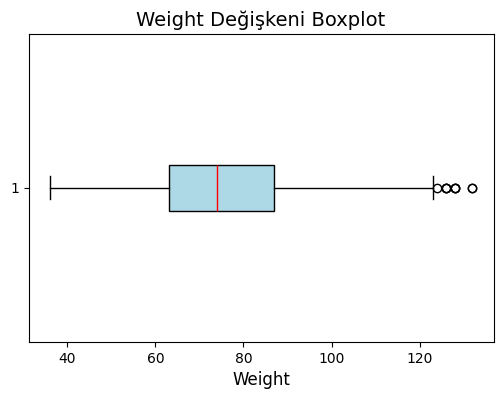

Weight - Aykırı değer sayısı: 9
Aykırı değerler: [132. 128. 128. 128. 124. 126. 126. 132. 126.]
----------------------------------------


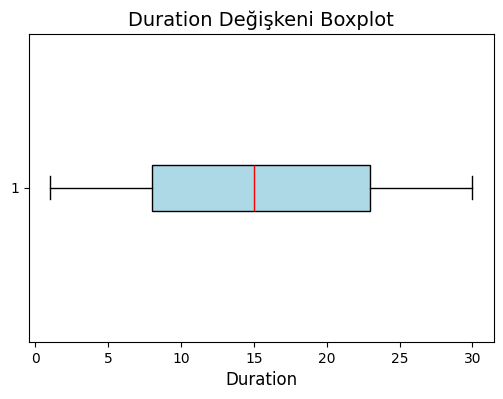

Duration - Aykırı değer sayısı: 0
----------------------------------------


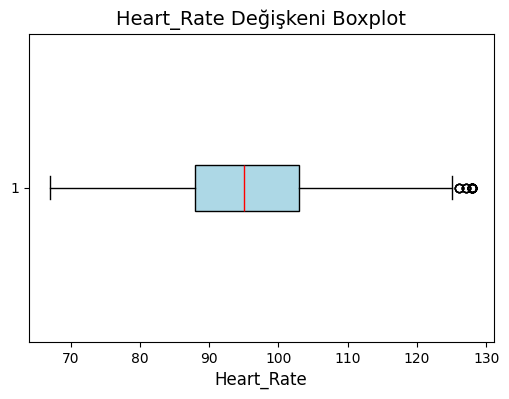

Heart_Rate - Aykırı değer sayısı: 36
Aykırı değerler: [127. 128. 128. 128. 128. 128. 128. 128. 128. 128. 126. 128. 128. 128.
 128. 128. 128. 126. 128. 128. 128. 128. 128. 128. 128. 128. 126. 128.
 128. 128. 127. 126. 127. 128. 128. 127.]
----------------------------------------


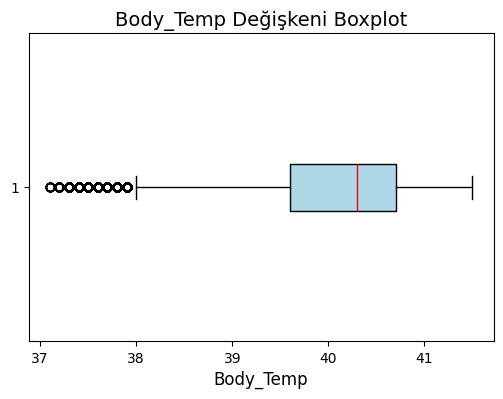

Body_Temp - Aykırı değer sayısı: 14919
Aykırı değerler: [37.7 37.6 37.9 ... 37.7 37.8 37.7]
----------------------------------------


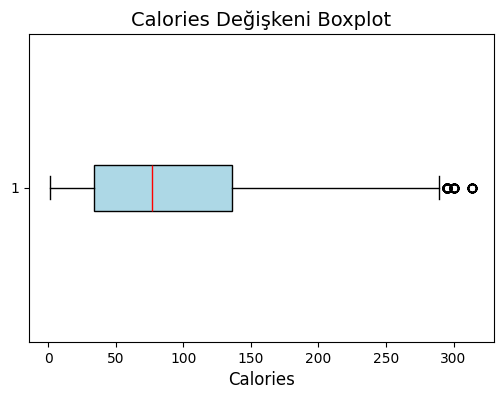

Calories - Aykırı değer sayısı: 139
Aykırı değerler: [295. 295. 295. 295. 295. 295. 295. 295. 300. 295. 295. 314. 295. 295.
 314. 295. 295. 314. 314. 314. 295. 295. 295. 314. 295. 295. 295. 314.
 300. 295. 295. 295. 295. 295. 300. 295. 300. 295. 300. 295. 295. 314.
 314. 314. 295. 295. 295. 300. 295. 300. 295. 295. 300. 295. 300. 295.
 295. 295. 300. 314. 300. 300. 300. 295. 295. 295. 314. 295. 300. 295.
 300. 295. 314. 295. 295. 295. 300. 295. 300. 314. 314. 295. 295. 295.
 300. 295. 295. 300. 300. 300. 300. 300. 295. 295. 314. 295. 300. 295.
 314. 295. 295. 314. 300. 295. 300. 300. 295. 295. 295. 314. 314. 295.
 300. 295. 295. 295. 314. 295. 295. 314. 295. 295. 300. 295. 314. 295.
 300. 295. 300. 295. 314. 295. 295. 295. 295. 295. 300. 314. 314.]
----------------------------------------


In [224]:
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(train_df[col], vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='black'),
                medianprops=dict(color='red'))
    plt.title(f"{col} Değişkeni Boxplot", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.show()


    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1

    alt_sinir = Q1 - 1.5 * IQR
    ust_sinir = Q3 + 1.5 * IQR

    aykiri_degerler = train_df[(train_df[col] < alt_sinir) | (train_df[col] > ust_sinir)][col]

    print(f"{col} - Aykırı değer sayısı: {len(aykiri_degerler)}")
    if len(aykiri_degerler) > 0:
        print("Aykırı değerler:", aykiri_degerler.values)
    print("-" * 40)


In [225]:
for col in ['Weight', 'Body_Temp', 'Heart_Rate', 'Height', 'Calories']:
    min_val = train_df[col].min()
    shift = 1 - min_val if min_val <= 0 else 0



train_df['Weight_log'] = np.log1p(train_df['Weight'] + shift)
test_df['Weight_log'] = np.log1p(test_df['Weight'] + shift)

train_df['Body_Temp_log'] = np.log1p(train_df['Body_Temp'] + shift)
test_df['Body_Temp_log'] = np.log1p(test_df['Body_Temp'] + shift)

train_df['Heart_Rate_log'] = np.log1p(train_df['Heart_Rate'] + shift)
test_df['Heart_Rate_log'] = np.log1p(test_df['Heart_Rate'] + shift)

train_df['Height_log'] = np.log1p(train_df['Height'] + shift)
test_df['Height_log'] = np.log1p(test_df['Height'] + shift)

train_df['Calories_log'] = np.log1p(train_df['Calories'] + shift)


In [226]:
X = train_df[['Weight_log', 'Height_log', 'Body_Temp_log', 'Heart_Rate_log']]
y = train_df['Calories_log']


In [227]:
features = ['Weight_log', 'Height_log', 'Body_Temp_log', 'Heart_Rate_log']

X_train = train_df[features]
X_test = test_df[features]

y_train = train_df['Calories_log']

In [228]:
from sklearn.metrics import accuracy_score

features = ['Weight_log', 'Height_log', 'Body_Temp_log', 'Heart_Rate_log']

X_train = train_df[features]
X_test = test_df[features]  # sadece log dönüşümlü sütunlar
y_train = train_df['Calories_log']

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [229]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [230]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

X_train = train_df.drop(columns=['Calories', 'Calories_log'])
y_train = train_df['Calories_log']

X_test = test_df.drop(columns=['Calories', 'Calories_log'], errors='ignore')

model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)


model.fit(X_train, y_train)


y_pred_log = model.predict(X_test)

y_pred = np.expm1(y_pred_log)

submission = pd.DataFrame({
    "Id": test_df["id"],
    "Calories": y_pred
})

submission.to_csv("submission_xgb.csv", index=False)
print("XGBoost submission dosyası kaydedildi!")


XGBoost submission dosyası kaydedildi!


In [231]:
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"Train seti RMSE: {rmse_train:.3f}")
print(f"Train set R2 score: {r2_val: .3f}")

Train seti RMSE: 0.060
Train set R2 score:  0.984


In [232]:
X_train_processed, X_val_processed, y_train_processed, y_val_processed = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train_processed, y_train_processed)

y_val_pred = model.predict(X_val_processed)
rmse_val = np.sqrt(mean_squared_error(y_val_processed, y_val_pred))
r2_val = r2_score(y_val_processed, y_val_pred)

print(f"Validation set RMSE: {rmse_val:.3f}")
print(f"Validation set R2 Score: {r2_val:.3f}")

Validation set RMSE: 0.123
Validation set R2 Score: 0.984


In [233]:
df = pd.read_csv('submission_xgb.csv')

df.head(10)

,Id,Calories
0,750000,26.955837
1,750001,109.475300
2,750002,88.027306
3,750003,125.278465
4,750004,74.308450
5,750005,21.972385
6,750006,47.562120
7,750007,6.836366
8,750008,9.969399
9,750009,207.802870


In [234]:
df.describe()

,Id,Calories
count,250000.000000,250000.000000
mean,874999.500000,88.170776
std,72168.927986,62.272617
min,750000.000000,0.860319
25%,812499.750000,34.048414
50%,874999.500000,76.518660
75%,937499.250000,135.638920
max,999999.000000,298.743650


In [235]:
train_df.describe()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Weight_log,Body_Temp_log,Heart_Rate_log,Height_log,Calories_log
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,0.500961,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781,4.315669,3.714273,4.564524,5.166092,4.141144
std,216506.495284,0.499999,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349,0.184843,0.019199,0.098876,0.073190,0.963231
min,0.000000,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000,3.610918,3.640214,4.219508,4.844187,0.693147
25%,187499.750000,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000,4.158883,3.703768,4.488636,5.105945,3.555348
50%,374999.500000,1.000000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000,4.317488,3.720862,4.564348,5.164786,4.356709
75%,562499.250000,1.000000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000,4.477337,3.730501,4.644391,5.225747,4.919981
max,749999.000000,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000,4.890349,3.749504,4.859812,5.407172,5.752573


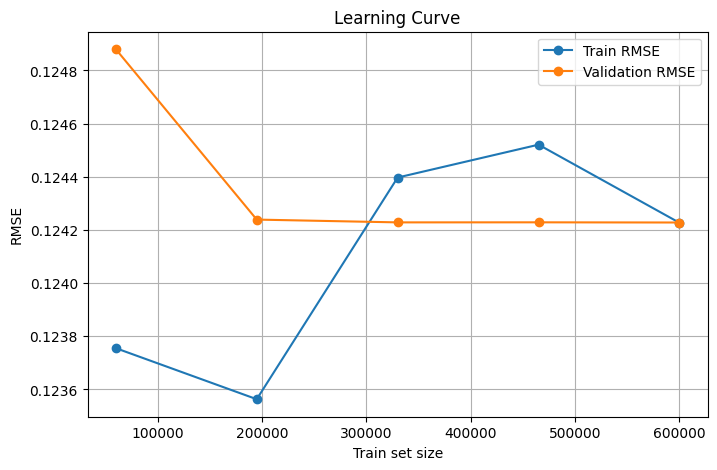

In [236]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np


X = train_df.drop(columns=['Calories', 'Calories_log'])
y = train_df['Calories_log']

train_sizes, train_scores, val_scores = learning_curve(
    model, X, y, cv=5, scoring='neg_root_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = -np.mean(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Train RMSE')
plt.plot(train_sizes, val_scores_mean, 'o-', label='Validation RMSE')
plt.xlabel('Train set size')
plt.ylabel('RMSE')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()
